## Content

- **Reshape with -ve index**


- **Matrix Multiplication**


- **Vectorization**



- **3D arrays**
    

- **Use Case: Image Manipulation using Numpy**
    - Opening an Image
    - Details of an image
    - Visualizing Channels
    - Rotating an Image (Transposing a Numpy Array)
    - Trim image
    - Saving `ndarray` as Image



In [ ]:
import numpy as np

## Reshape in 2D array

#### We saw reshape and flatten. What if i want to convert a matrix to 1D array using `reshape()`
#### Question: What should I pass in `A.reshape()` if I want to use it to convert `A` to 1D vector?

- **(1, 1)?** - **NO** 


- It means we only have a single element


- But **we don't have a single element**

In [ ]:
A = np.arange(12).reshape(3,4)

In [ ]:
A.reshape(1, 1)

ValueError: ignored

- So, **(1, 12)?** - **NO** 


- It will **still remain a 2D Matrix with dimensions $1\times12$**

In [ ]:
A.reshape(1, 12)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

- **Correct answer is (12)**


- We need a vector of dimension (12,)


- So we need to pass only 1 dimension in `reshape()`

In [ ]:
A.reshape(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### So, Be careful while using `reshape()` to convert a Matrix into a 1D vector

#### What will happen if we pass a negative integer in `reshape()`?

In [ ]:
A.reshape(6, -1)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

#### Surprisingly, it did not give an error

- It is able to **figure out on its own** what should be the **value in-place of negative integer**


- Since **no. of elements in our matrix is 12**


- And **we passed 6 as no. of rows**


- It is **able to figure out** that **no. of columns should be 2**


**Same thing happens with this:**

In [ ]:
A.reshape(-1, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

## Matrix multiplication

#### Question: What will be output of following? 

In [ ]:
a = np.arange(5)
b = np.ones(5) * 2

In [ ]:
a * b 

array([0., 2., 4., 6., 8.])

Recall that, if a and b are 1D, * operation will perform elementwise multiplication


#### Lets try * with 2D arrays

In [ ]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
B = np.arange(12).reshape(3, 4)
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
A * B

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

**Again did element-wise multiplication**

#### For actual Matrix Multiplication, We have a different method/operator

`np.matmul()`




#### What is the requirement of dimensions of 2 matrices for Matrix Multiplication?

- **Columns of A = Rows of B** (A **Must condition** for Matric Multiplication)


- **If A is $3\times4$, B can be $4\times3$**... or $4\times(Something Else)$

#### So, lets reshape B to $4\times3$ instead

In [ ]:
B = B.reshape(4, 3)
B

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
np.matmul(A, B)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

- **We are getting a $3\times3$ matrix as output**

- So, this is doing Matrix Multiplication

#### There's a direct operator as well for Matrix Multiplication
`@`

In [ ]:
A @ B

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

#### Question: What will be the dimensions of Matrix Multiplication `B @ A`?

- $4\times4$

In [ ]:
B @ A

array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218]])

#### There is another method in np for doing Matrix Multiplication


In [ ]:
np.dot(A, B)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

**Other cases of `np.dot()`**
- It performs dot product when both inputs are 1D array
- It performs multiplication when both input are scalers.


In [ ]:
a= np.array([1,2,3])
b = np.array([1,1,1])


In [ ]:
np.dot(a,b) # 1*1 + 2*1 + 3*1 = 6 # dot product, inner product

6

In [ ]:
np.dot(4,5)

20

#### Now, Let's try multiplication of a mix of matrices and vectors



In [ ]:
A = np.arange(12).reshape(3, 4)  # A is a 3x4 Matrix 
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
a = np.array([1, 2, 3])  # a although a (3,) can be thought of as row vector
print(a.shape)

[1 2 3]
(3,)


In [ ]:
np.matmul(A, a)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

**Columns of `A` $\neq$ Rows of `a`**

Lets try revervse

In [ ]:
np.matmul(a, A)

array([32, 38, 44, 50])

YES, **Columns of `a` (3) = Rows of `A` (3)**

## Vectorization

- We have already seen vectorization some time ago

#### Remember doing scaler operations on np arrays?

`A * 2`

#### That's vectorization

- Replacing explicit loops with array expressions is commonly referred to as vectorization.

- Vectorization helps us to **perform operations directly on Arrays instead of scaler**.

- Operation gets performed on each element of np array

#### Revisiting the example:

In [ ]:
A = np.arange(10)

In [ ]:
A * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

#### `np.vectorize()`

- `np.vectorize()` defines a **vectorized function**


- It **takes numpy arrays as inputs** and **returns a single numpy array or a tuple of numpy arrays**. 


- The vectorized function **evaluates element by element of the input arrays** like the python `map` function


#### Let's plot graph for `y = log(x)` (Log function) using` np.vectorize()`

- We will pass in a numpy array, as **it can then take a vector/array/list as input**


- It will **return the vectorized form of `math.log()` function**

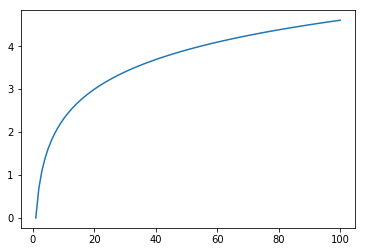

In [ ]:
import math
import matplotlib.pyplot as plt

x = np.arange(1, 101)

y = np.vectorize(math.log)(x)

plt.plot(x, y)
plt.show()

In [ ]:
y

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748

## 3 Dimensional Arrays

### Vectors, Matrix and Tensors

1. **Vector** ---> **1-Dimensional** Array
2. **Matrix** ---> **2-Dimensional** Array
3. **Tensor** ---> **More generic term**


#### `Tensor` is a general term we use

- Tensor can also be less than 3D


- **2D Tensor** is called a **Matrix**
- **1D Tensor** is called a **Vector**

In [ ]:
B = np.arange(24).reshape(2, 3, 4)
B

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

#### Now, What is happening here?

#### Question: How many dimensions `B` has?
- 3


- It's a **3-dimensional tensor**


#### How is `reshape(2, 3, 4)` working?

- If you see, it is giving 2 matrices


- Each matrix has 3 rows and 4 columns


#### So, that's how reshape() is interpreted for 3D

- **1st argument** gives **depth** (No. of Matrices)


- **2nd agrument** gives **no. of rows** in each depth


- **3rd agrument** gives **no. of columns** in each depth


#### How can I get just the whole of 1st Matrix?

In [ ]:
B[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### Question: What value will I get if I do `B[0, 0, 0]`?

In [ ]:
B[0, 0, 0]

0

In [ ]:
#### Question: What value will I get if I do `B[1, 1, 1]`?
B[1, 1, 1]

# It looks at Matrix 1, that is, 2nd Matrix (Not Matrix 0)
# Then it looks at row 1 of matrix 1
# Then it looks at column 1 of row 1 of matrix 1

17

#### We can also Slicing in 3-Dimensions

- Works same as in 2-D matrices

## Use Case: Image Manipulation using Numpy 

- By now, you already have an idea that Numpy is an amazing open-source Python library for **data manipulation** and **scientific computing**. 


- It is used in the domain of **linear algebra**, Fourier transforms, **matrices**, and the **data science field**. 


- **NumPy arrays are way faster than Python Lists**.


#### Do you know Numpy can also be used for Image Processing? 

- The fundamental idea is that we know **images are made up of Numpy `ndarrays`**. 


- So we can **manipulate these arrays and play with images**. 


- This use case is to give you a broad overview of **Numpy for Image Processing.**

#### Make sure the required libraries are imported

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Now, we'll see how we can play with images using Numpy

## Opening an Image 

- Well, to play with an image, we first need to open it

#### But, How can we open an image in our code?

- To open an image, we will use the `matplotlib` library to read and show images. 


- We will cover all the functionalities of `matplotlib` in detail in visualization lecture.


- For this use case, just know that it uses an image module for working with images. 


- It offers two useful methods **`imread()` and `imshow()`**.


**`imread()` – to read the images**

**`imshow()` – to display the images**


#### Now, Let's go ahead and load our image

#### Drive link for the image:

Download the image `fruits.jpg` from here: https://drive.google.com/file/d/1lHPQUi3wdB6HxN-SNJSBQXK7Z0y0wf32/view?usp=sharing

and place it in your current working directory

#### Let's download the images first

In [ ]:
#fruits image
!gdown 17tYTDPBU5hpby9t0kGd7w_-zBsbY7sEd 

Downloading...
From: https://drive.google.com/uc?id=17tYTDPBU5hpby9t0kGd7w_-zBsbY7sEd
To: /content/fruits.png
100% 4.71M/4.71M [00:00<00:00, 153MB/s]


In [ ]:
#emma stone image
!gdown 1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI 

Downloading...
From: https://drive.google.com/uc?id=1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI
To: /content/emma_stone.jpeg
100% 80.3k/80.3k [00:00<00:00, 65.4MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

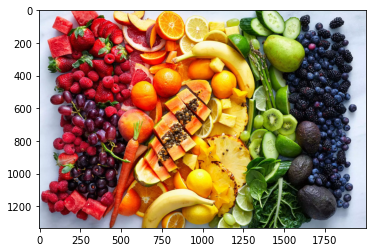

In [ ]:
img = plt.imread('fruits.png')
plt.imshow(img)

### Details of an Image 
#### What do you think are the dimensions and shape of this image?

We will see what is the **dimension and shape of this image**, using the **`Image.ndim`** and **`Image.shape`** properties.

In [ ]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image

# of dims:  3
Img shape:  (1333, 2000, 3)


#### How come our 2-D image has 3 dimensions?

- **Coloured images have a 3rd dimension for depth or RGB colour channel**


- Here, the **depth is 3**


- But we will come to what RGB colour channels are in a bit


#### First, Let's understand something peculiar happening here with the `shape` of image

#### Do you see something different happening here when we check the `shape` of image?

- When we discussed **3-D Arrays**, we saw that **depth was the first element of the `shape` tuple**


- But when we are loading an image using **matplotlib and getting its 3-D array**, we see that **depth is the last element of the `shape` tuple**


#### Why is there a difference b/w normal np array and the np array generated from Matplotlib in terms of where the depth part of `shape` appears?

- This is how `matplotlib` reads the image


- It **reads the depth values (R, G and B values) of each pixel one by one** and stacks them one after the other


#### The shape of imge we read is:  (1333, 2000, 3) 

- `matplotlib` **first reads that each plane has $1333\times2000$ pixels**


- Then, it **reads depth values (R, G and B values) of each pixel and place the values in 3 separate planes**


- That is why **depth is the last element of `shape` tuple in np array generated from an image read by `matplotlib`**


- Whereas in a **normal np array, depth is the first element of `shape` tuple**


#### Now, What are these RGB channels and How can we visualize them?

## Visualizing RGB Channels 
We can split the image into each RGB color channels using only Numpy 

#### But, What exactly RGB values are?

- These are values of each pixel of an image


- Each pixel is made up of **3 components/channels** - **Red, Green, Blue** - which form RGB values


- Coloured images are usually stored as 3-dimensional arrays of **8-bit unsigned integers**


- So, the range of values that each channel of a pixel can take is $0$ to $2^8 - 1$


- That is, each pixel's each channel, R, G and B can range from **0 to 255**


#### Each pixel has these 3 values which combined together forms the colour that the pixel represents

- So, a pixel **[255, 0, 0 ]** will be **RED** in colour

- A pixel **[0, 255, 0]** will be **GREEN** in colour

- A pixel **[0, 0, 255]** will be **BLUE** in colour


#### Question: What will be the colour of pixel [0, 0, 0]?

- Black


#### Question: What will be the colour of pixel [255, 255, 255]?

- White


#### Now, Let's separate the R, G, B channels in our image:

- We'll make use of **slicing of arrays**

- For **RED** channel, we'll **set values of GREEN and BLUE to 0**



In [ ]:
img = np.array(plt.imread('fruits.png'))

img_R = img.copy()

img_R[:, :, (1, 2)] = 0


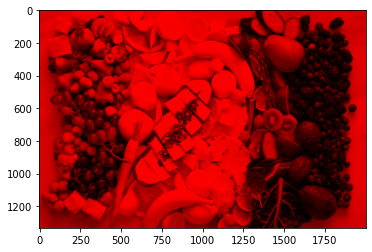

In [ ]:
plt.imshow(img_R)

Similarly, for GREEN channel, we'll set values of RED and BLUE to 0

... and same for BLUE channel

### Rotating an Image (Transpose the Numpy Array)

#### Now, What if we want to rotate the image?

- Remember **image is a Numpy array**


- **Rotating the image means transposing the array**


#### For this, we'll use the `np.transpose()` function in numpy

#### Now, Let's understand `np.transpose()` function first

- It takes 2 arguments


**1st argument** is obviously the **array that we want to transpose (image array in our case)**


**2nd argument is `axes`**
- Its a **tuple or list of ints**

- It contains a **permutation of [0,1,..,N-1] where N is the number of axes of array**

#### Now, our image array has 3 axes (3 dimensions) ---> 0th, 1st and 2nd

- We specify how we want to transpose the array by giving an **order of these axes inside the tuple**

    - **Vertical axis (Row axis) is 0th axis**
    - **Horizontal axis (Column axis) is 1st axis**
    - **Depth axis is 2nd axis**


- **In order to rotate the image, we want to transpose the array**


- That is, we want to **transpose rows into columns and columns into rows**


- So, we want to **interchange the order of row and column axis** ---> **interchange order of 0th and 1st axis**


- We **don't want to change the depth axis (2nd axis)** ---> So, it will **remain at its original order position**


Now, the **order of axes in orginal image is `(0, 1, 2)`**

#### What will be the order of axes rotated image or transposed array?

- The **order of axes in rotated image will be `(1, 0, 2)`** 


- **Order (Position) of 0th and 1st column is interchanged**


#### Let's see it in action:

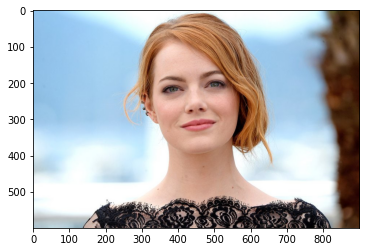

In [ ]:
img = np.array(plt.imread('emma_stone.jpeg'))
plt.imshow(img)

In [ ]:
img.shape

(600, 900, 3)

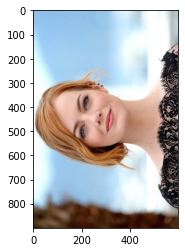

In [ ]:
img_rotated = np.transpose(img, (1,0,2))
plt.imshow(img_rotated)

#### As you can see:

- We obtained the **rotated image by transposing the np array**

### Trim Image 

#### Now, How can we crop an image using Numpy?

- Remember! Image is a numpy array of pixels

- So, We can trim/crop an image in Numpy using Array using **Slicing**.


#### Let's first see the original image

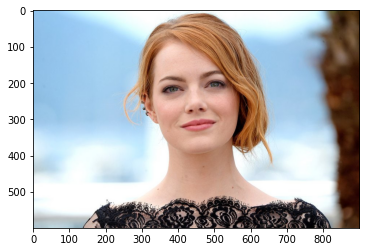

In [ ]:
img = np.array(plt.imread('./emma_stone.jpeg'))

plt.imshow(img)

#### Now, Let's crop the image to get the face only

- If you see x and y axis, the face starts somewhat from ~200 and ends at ~700 on x-axis
    - **x-axis in image is column axis in np array**
    - Columns change along x-axis


- And it lies between ~100 to ~500 on y-axis
    - **y-axis in image is row axis in np array**
    - Rows change along y-axis


#### We'll use this information to slice our image array

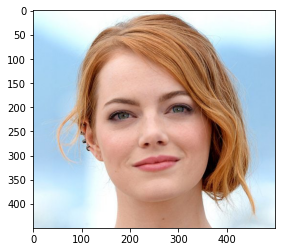

In [ ]:
img_crop = img[0:450, 200:700, :]
plt.imshow(img_crop)

## Saving Image as `ndarray` 

#### Now, How can we save `ndarray` as Image?

To save a `ndarray` as an image, we can use `matplotlib`'s `plt.imsave()` method.


- **1st agrument** ---> We provide the path and name of file we want to save the image as


- **2nd agrument** ---> We provide the image we want to save


#### Let's save the cropped face image we obtained previously 

In [ ]:
path = 'emma_face.jpg'
plt.imsave(path, img_rotated)

#### Now, if you go and check your current working directory, image would have been saved by the name `emma_face.jpg`